# Bài tập thực hành 1.2.3

## (1) Import thư viện, cài đặt cấu hình, lấy và hiển thị dữ liệu
Bước đầu tiên nhằm chuẩn bị môi trường làm việc, bao gồm việc import các thư viện cần thiết cho quá trình xử lý, phân cụm và trực quan hóa dữ liệu, như Pandas, NumPy, Matplotlib, Scikit-learn và Seaborn.


In [3]:
#Nạp các gói lệnh cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Cài đặt style cho hiển thị
plt.style.use('seaborn-v0_8')
sns.set_theme(context='notebook', style='whitegrid', palette='muted')

In [5]:
#Load & xem nhanh dữ liệu
wine = pd.read_csv("red_wine.csv")
print("Kích thước dữ liệu:", wine.shape)
wine.head()

Kích thước dữ liệu: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Nhận xét:
Bộ dữ liệu Red Wine Quality là một tập dữ liệu sạch, có 1599 hàng và 12 cột, với không có giá trị thiếu (NaN). Các cột thuộc tính hóa học chủ yếu là số thực (float64), còn biến mục tiêu (quality) là số nguyên. Tuy nhiên, dữ liệu có tồn tại các hàng trùng lặp chính xác (như hàng 0 và hàng 4) cần được loại bỏ trong bước tiền xử lý để tránh làm mô hình bị thiên lệch, sau đó dữ liệu sẽ sẵn sàng cho việc phân tích thống kê mô tả và xây dựng mô hình dự đoán chất lượng rượu vang.

## (2)Phân tích đơn biến

### Trực quan dữ liệu bằng Histogram
Trực quan dữ liệu bằng Histogram (Biểu đồ tần suất) được sử dụng chủ yếu để khám phá sự phân bố của một biến định lượng. Nó giúp ta nhanh chóng xác định hình dạng phân phối (đối xứng, lệch phải/trái), nhận diện xu hướng trung tâm (giá trị phổ biến nhất), và phát hiện các giá trị ngoại lai (outliers). Đây là công cụ cơ bản để hiểu cấu trúc dữ liệu, hỗ trợ cho các bước tiền xử lý như chuẩn hóa (scaling) và lựa chọn mô hình thống kê phù hợp.

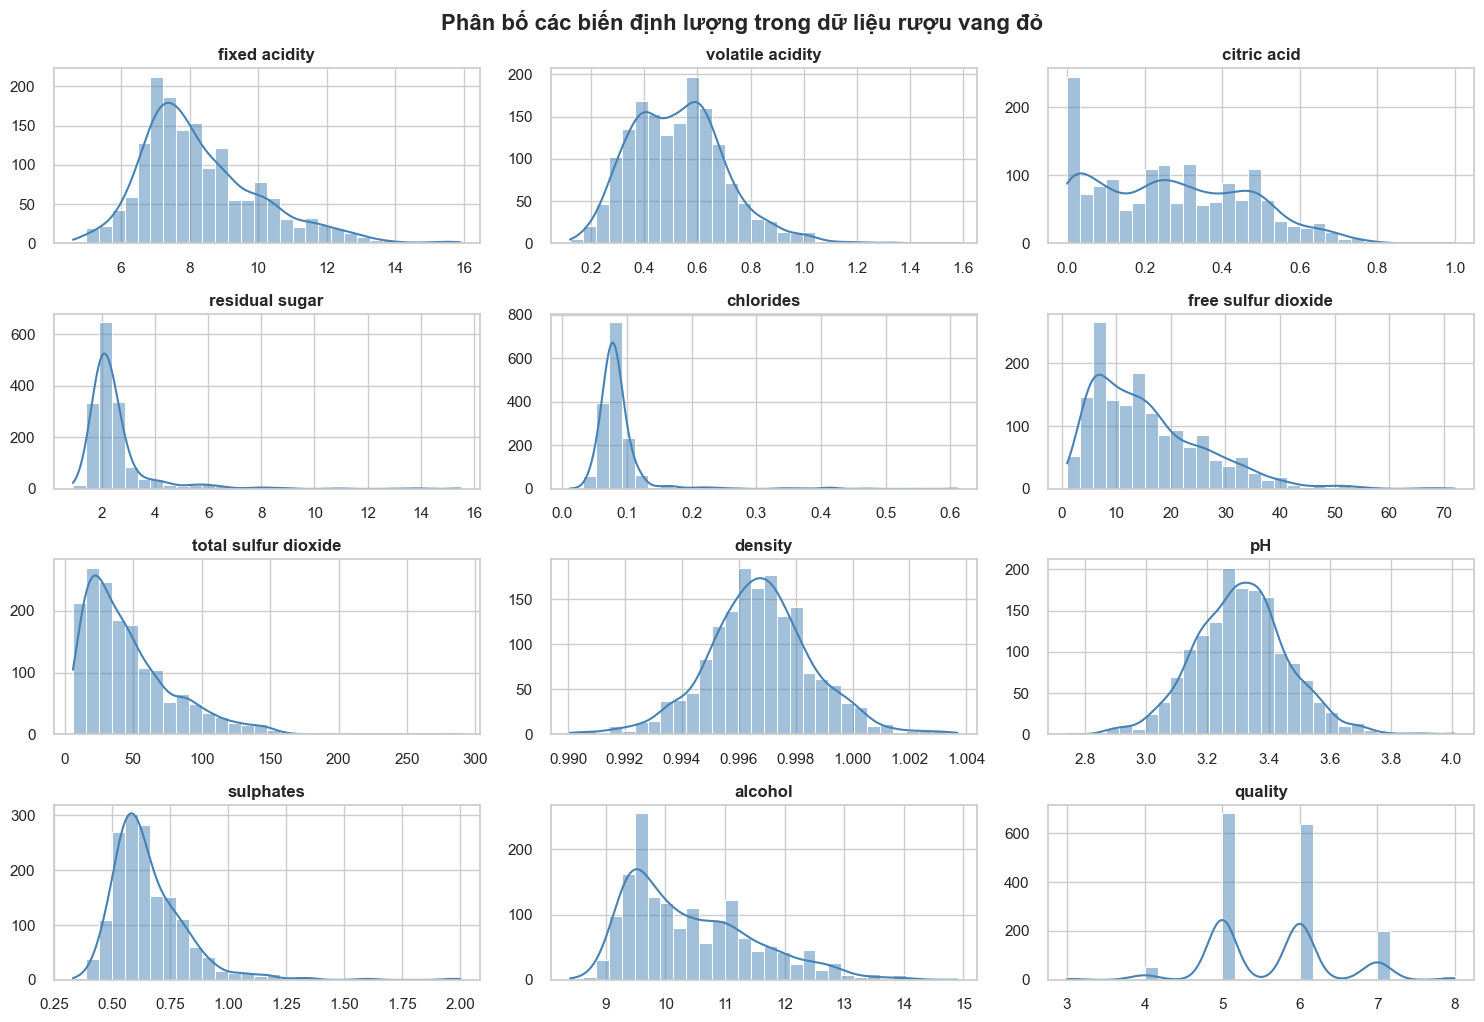

In [6]:
#Trực quan phân bô của dữ liệu định lượng bằng đồ thị Histogram
num_cols = wine.select_dtypes(include='number').columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(wine[col], bins=30, kde=True, color='steelblue')
    plt.title(col, fontsize=12, weight='bold')
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.suptitle('Phân bố các biến định lượng trong dữ liệu rượu vang đỏ', fontsize=16, weight='bold', y=1.02)
plt.show()

#### Nhận xét:
Bộ dữ liệu Red Wine Quality có cấu trúc vững chắc, với 1599 hàng và 12 cột, trong đó có 11 thuộc tính hóa học và biến mục tiêu quality. 
Dữ liệu có chất lượng cơ bản tốt vì không có giá trị thiếu (NaN), tạo điều kiện thuận lợi cho việc phân tích. 
Về phân phối, các thuộc tính như pH và density cho thấy phân bố gần như đối xứng, trong khi các yếu tố khác như sulphates và volatile acidity có độ biến thiên cao và xu hướng lệch phải, mang lại cơ hội để áp dụng các kỹ thuật biến đổi dữ liệu nhằm khám phá sâu hơn mối quan hệ giữa các thành phần hóa học và chất lượng rượu. 
Biến quality tập trung chủ yếu ở mức 5 và 6, cho phép xây dựng mô hình Học máy để phân loại hoặc dự đoán điểm chất lượng.

### Trực quan dữ liệu bằng biểu đồ Boxplot
Trực quan dữ liệu bằng Boxplot (Biểu đồ hộp và râu) được sử dụng để tóm tắt phân bố của một biến định lượng dựa trên năm chỉ số thống kê. Mục đích chính là nhận diện nhanh các giá trị ngoại lai (outliers) nằm ngoài râu, đồng thời đánh giá xu hướng trung tâm (trung vị), độ phân tán (chiều dài hộp), và độ lệch của dữ liệu. Đây là công cụ hữu ích để so sánh phân bố giữa các nhóm và quyết định các bước tiền xử lý ngoại lai cần thiết.

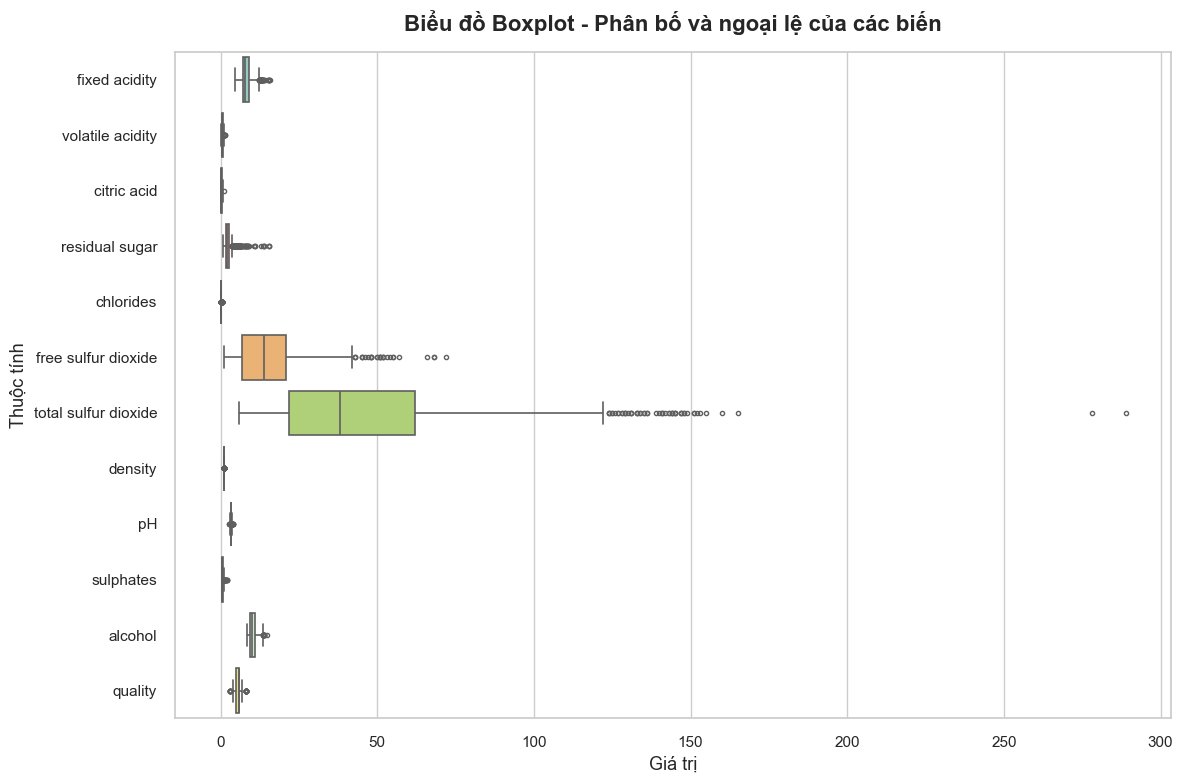

In [7]:
#Trực quan dữ liệu bằng biểu đồ Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=wine, orient='h', palette='Set3', linewidth=1.2, fliersize=3)
plt.title("Biểu đồ Boxplot - Phân bố và ngoại lệ của các biến", fontsize=16, weight='bold', pad=15)
plt.xlabel("Giá trị", fontsize=13)
plt.ylabel("Thuộc tính", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

#### Nhận xét:
Dựa trên biểu đồ Boxplot, dữ liệu Red Wine Quality thể hiện rõ các vấn đề về độ phân tán và ngoại lệ, cần được xử lý trong tiền xử lý.Ngoại lệ phổ biến: Hầu hết các biến đều có ngoại lệ (các chấm nhỏ nằm ngoài râu), cho thấy cần phải có bước xử lý ngoại lai bắt buộc để làm sạch dữ liệu.Phân tán và Ngoại lệ nghiêm trọng: Các thuộc tính về Sulfur Dioxide, total sulfur dioxide và free sulfur dioxide có mức độ ngoại lệ và độ phân tán lớn nhất, với các giá trị kéo dài rất xa, đòi hỏi phải áp dụng các kỹ thuật xử lý ngoại lai hoặc biến đổi dữ liệu mạnh mẽ.Thuộc tính ổn định: Các biến như density và pH cho thấy phân bố tương đối ổn định và tập trung, với rất ít hoặc không có ngoại lệ nằm xa râu, cho thấy dữ liệu của chúng đã có chất lượng tốt.Ngoại lệ ở biến mục tiêu: Biến quality cũng có ngoại lệ, đại diện cho các mẫu rượu vang có chất lượng 3  hoặc 8, xác nhận sự mất cân bằng lớp ở các điểm cực và cần được chú ý khi đánh giá hiệu suất mô hình.

## (3)Phân tích mối tương quan giữa các biến
Phân tích mối tương quan (Correlation Analysis) nhằm mục đích chính là định lượng mức độ và chiều hướng của mối quan hệ tuyến tính giữa các biến số. Nó đóng vai trò quan trọng trong việc khám phá cấu trúc dữ liệu, giúp ta xác định: 
1) Mối liên hệ tự nhiên giữa các thuộc tính
2) Lựa chọn đặc trưng bằng cách ưu tiên các biến có tương quan mạnh với biến mục tiêu
3) Xử lý đa cộng tuyến (Multicollinearity) bằng cách loại bỏ các biến độc lập có tương quan quá cao với nhau, từ đó đảm bảo mô hình dự đoán được xây dựng ổn định và dễ giải thích hơn.


### Trực quan mối quan hệ giữa các biến bằng Heatmap
Trực quan mối tương quan giữa các biến bằng Heatmap (Biểu đồ nhiệt) nhằm mục đích chính là trình bày ma trận tương quan một cách trực quan, giúp người xem nhanh chóng đánh giá mức độ và chiều hướng của mối quan hệ tuyến tính giữa tất cả các cặp biến.
Cụ thể, Heatmap trong phân tích tương quan phục vụ các mục đích sau:
1) Đánh giá Tương quan với Biến Mục tiêu: Dễ dàng nhận ra các đặc trưng có mối quan hệ mạnh mẽ nhất (tương quan dương hoặc âm) với biến mục tiêu thông qua màu sắc đậm nhất trên hàng hoặc cột của biến mục tiêu. Đây là bước quan trọng để lựa chọn đặc trưng (Feature Selection).
2) Phát hiện Đa Cộng tuyến (Multicollinearity): Xác định các cặp biến độc lập có tương quan quá cao. Việc này cảnh báo rằng mô hình có thể bị dư thừa thông tin hoặc không ổn định, và cần loại bỏ một trong các biến liên quan.
3) Tóm tắt Toàn diện: Thay vì phải đọc một bảng số (ma trận tương quan) phức tạp, Heatmap sử dụng màu sắc và độ sáng để mã hóa giá trị tương quan, cho phép nắm bắt bức tranh tổng thể về cấu trúc tương quan của bộ dữ liệu chỉ trong một cái nhìn.

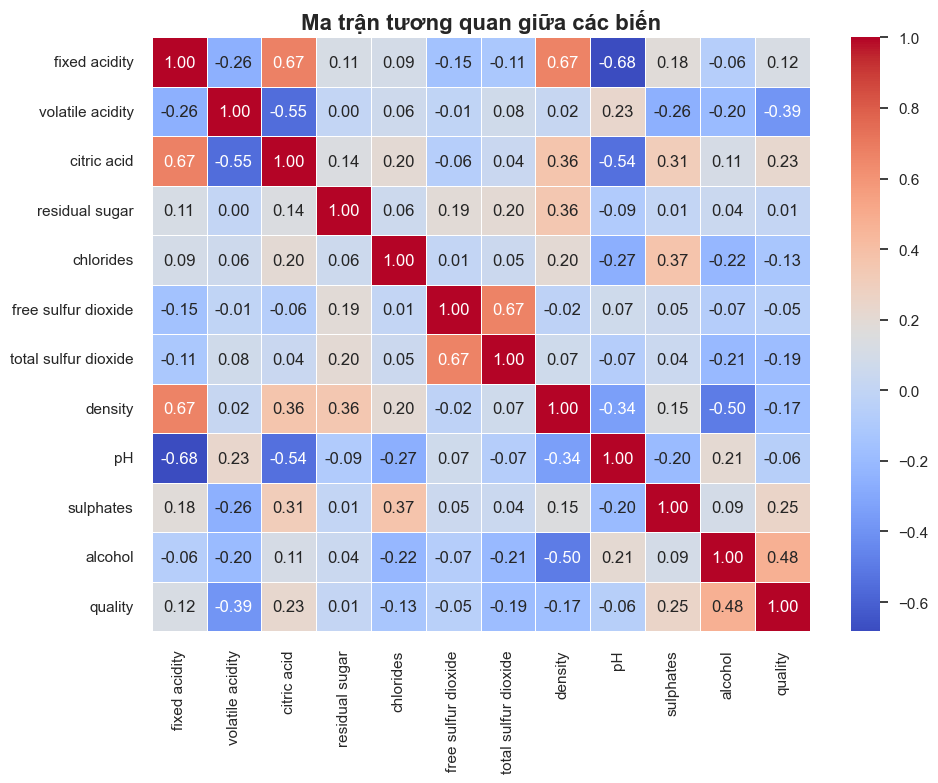

In [8]:
#Trực quan mối quan hệ giữa các biến bằng Heatmap
plt.figure(figsize=(10,8))
corr = wine.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Ma trận tương quan giữa các biến', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

#### Nhận xét:
Phân tích tương quan bằng Heatmap cho thấy các mối quan hệ tuyến tính rõ rệt trong bộ dữ liệu Red Wine Quality. Alcohol 0.48 và volatile acidity -0.39 là hai đặc trưng quan trọng nhất có tương quan mạnh nhất với biến mục tiêu quality. Bên cạnh đó, biểu đồ cũng cảnh báo về vấn đề đa cộng tuyến cần được xử lý, điển hình là tương quan cực mạnh giữa free sulfur dioxide và total sulfur dioxide +0.67, cũng như giữa fixed acidity và pH -0.68). Việc xử lý đa cộng tuyến sẽ giúp mô hình ổn định và dễ giải thích hơn, trong khi việc ưu tiên alcohol và volatile acidity sẽ tối đa hóa khả năng dự đoán chất lượng rượu vang.

### Trực quan mối quan hệ giữa các biến bằng Pairplot 
Trực quan mối quan hệ giữa các biến bằng Pairplot (Biểu đồ cặp) nhằm mục đích chính là cung cấp cái nhìn toàn diện và đa chiều về sự phân bố và mối quan hệ giữa mọi cặp biến trong tập dữ liệu. Pairplot cho phép ta đồng thời đánh giá hình dạng phân phối của từng biến riêng lẻ (trên đường chéo chính) và khám phá các mối quan hệ phức tạp, phi tuyến tính giữa các cặp biến (trên các ô Scatter plot). Quan trọng hơn, khi gán màu cho biến mục tiêu, Pairplot là công cụ tuyệt vời để đánh giá mức độ phân tách giữa các lớp dữ liệu, từ đó xác định liệu mô hình phân loại có tiềm năng hoạt động hiệu quả hay không.

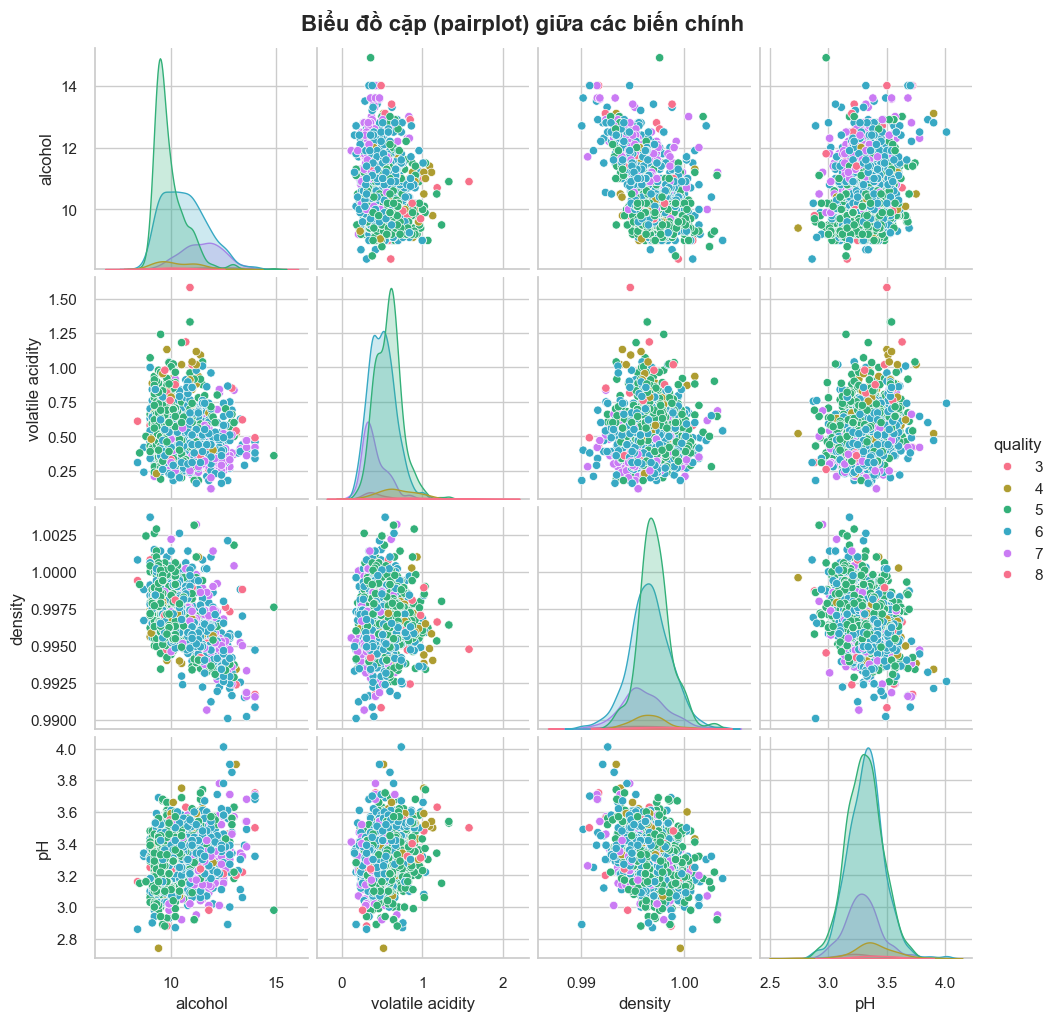

In [9]:
#Trực quan mối quan hệ giữa các biến bằng Pairplot
sns.pairplot(wine[['alcohol', 'volatile acidity', 'density', 'pH', 'quality']], diag_kind='kde', hue='quality', palette='husl')
plt.suptitle('Biểu đồ cặp (pairplot) giữa các biến chính', y=1.02, fontsize=16, weight='bold')
plt.show()

#### Nhận xét:
Dựa trên biểu đồ Pairplot của bốn biến chính trong bộ dữ liệu Red Wine Quality alcohol, volatile acidity, density, pH, dưới đây là nhận xét về mối quan hệ giữa các biến và mức độ phân tách theo quality:
1. Phân bố Cá nhân (Đường chéo chính)Các biểu đồ mật độ (KDE plots) trên đường chéo chính xác nhận hình dạng phân phối đã được nhận xét trước đó:alcohol và pH có phân bố khá đối xứng, tập trung. volatile acidity có phân bố hơi lệch phải.Các lớp quality(màu sắc) trùng lặp đáng kể trong phân bố của từng biến, cho thấy một biến đơn lẻ không đủ để phân loại chất lượng rượu. Ví dụ: Rượu vang chất lượng thấp (màu đỏ/vàng) và chất lượng cao (màu xanh/tím) có nồng độ alcohol nằm trong cùng một phạm vi lớn.
2. Mối quan hệ giữa các Cặp biến (Scatter Plots)Các biểu đồ phân tán giúp trực quan hóa mối tương quan đã được định lượng trong Heatmap:alcohol với volatile acidity: Thể hiện mối tương quan âm yếu/vừa (các điểm phân tán ngược chiều nhau), nhưng sự phân tách lớp vẫn rất kém alcohol vs. density: Thể hiện mối tương quan âm rõ ràng (khi alcohol tăng,density giảm). Các điểm chất lượng cao (màu xanh/tím, quality 6, 7) có xu hướng tập trung ở vùng density thấp và alcohol cao hơn, gợi ý rằng đây là một tổ hợp đặc trưng tốt để phân biệt volatile acidity vs.pH: Thể hiện sự phân tán rộng, không có mối quan hệ tuyến tính mạnh mẽ, và các lớp quality hầu như không thể phân biệt được.
3. Khả năng Phân loại theo quality Phân tách Kém: Tổng thể, Pairplot cho thấy sự chồng chéo lớn giữa các lớp quality (các màu sắc). Điều này ngụ ý rằng:Các mô hình phân loại sẽ khó đạt được độ chính xác cao nếu chỉ dựa vào bốn đặc trưng này.Sự phân biệt chất lượng rượu vang phụ thuộc vào tổ hợp phức tạp của nhiều thuộc tính, chứ không phải một cặp biến đơn lẻ.Tập trung Lớp (Outliers): Rượu vang chất lượng rất cao quality 8, màu hồng/tím nhạt) và rất thấp quality3 , màu đỏ) là rất ít và thường nằm rải rác.

# Bài thực hành 1.2.4

# Trực quan hóa dữ liệu cho bộ dữ liệu về Diabete

## (1) Import thư viện, cài đặt cấu hình, lấy và hiển thị dữ liệu
Bước đầu tiên nhằm chuẩn bị môi trường làm việc, bao gồm việc import các thư viện cần thiết cho quá trình xử lý, phân cụm và trực quan hóa dữ liệu, như Pandas, NumPy, Matplotlib, Scikit-learn và Seaborn.

In [10]:
#Nạp các gói lệnh cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Cài đặt Style cho hiển thị
plt.style.use('seaborn-v0_8')
sns.set_theme(context='notebook', style='whitegrid', palette='muted')

In [11]:
#Load và Xem nhanh dữ liệu
diabetes = pd.read_csv("diabetes.csv")
print("Kích thước dữ liệu:", diabetes.shape)
display(diabetes.head())

Kích thước dữ liệu: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Nhận xét:
Bộ dữ liệu Pima Indians Diabetes có kích thước nhỏ gọn với 768 hàng và 9 cột, được thiết lập cho bài toán phân loại nhị phân (biến mục tiêu Outcome là 0 hoặc 1). Về mặt cấu trúc, dữ liệu rất sạch vì không có giá trị thiếu (Non-Null Count là 768 cho tất cả các cột). 


## (2)Phân tích đơn biến
### Trực quan dữ liệu bằng Histogram
Trực quan dữ liệu bằng Histogram (Biểu đồ tần suất) được sử dụng chủ yếu để khám phá sự phân bố của một biến định lượng. Nó giúp ta nhanh chóng xác định hình dạng phân phối (đối xứng, lệch phải/trái), nhận diện xu hướng trung tâm (giá trị phổ biến nhất), và phát hiện các giá trị ngoại lai (outliers). Đây là công cụ cơ bản để hiểu cấu trúc dữ liệu, hỗ trợ cho các bước tiền xử lý như chuẩn hóa (scaling) và lựa chọn mô hình thống kê phù hợp.

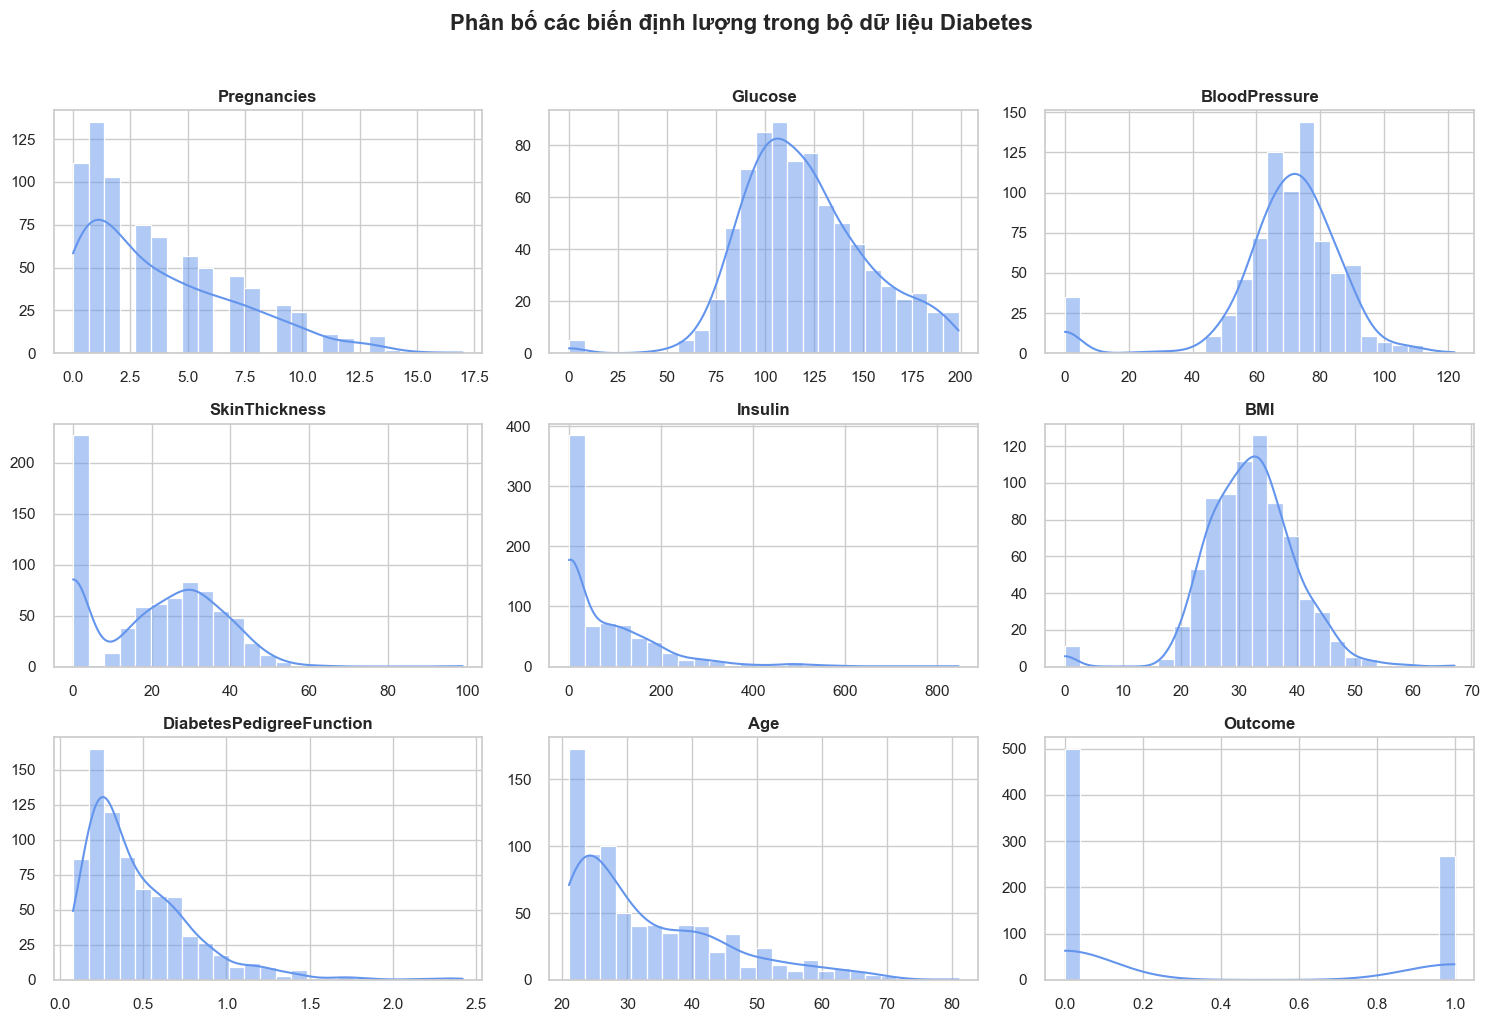

In [12]:
#Trực quan phân bô của dữ liệu định lượng bằng đồ thị Histogram
num_cols = diabetes.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(diabetes[col], bins=25, kde=True, color='cornflowerblue')
    plt.title(col, fontsize=12, weight='bold')
    plt.xlabel('')
    plt.ylabel('')
plt.suptitle('Phân bố các biến định lượng trong bộ dữ liệu Diabetes', fontsize=16, weight='bold', y=1.02)
plt.tight_layout()
plt.show()

#### Nhận xét:
Phân tích đơn biến của bộ dữ liệu Diabetes cho thấy các vấn đề chất lượng dữ liệu và phân bố. Các biến Insulin, SkinThickness, DiabetesPedigreeFunction, và Pregnancies đều lệch phải mạnh, đặc biệt Insulin và SkinThickness có tần suất 0 cao, cho thấy cần xử lý giá trị thiếu và biến đổi log để giảm ảnh hưởng ngoại lai. Biến mục tiêu Outcome bị mất cân bằng lớp nghiêm trọng, với lớp $0$ (không mắc bệnh) chiếm ưu thế, điều này đòi hỏi phải áp dụng các kỹ thuật cân bằng lớp khi huấn luyện mô hình.
Ngoài ra, các biến Glucose, BloodPressure, và BMI có phân bố gần như chuẩn sau khi loại bỏ tần suất 0 không hợp lý, cho thấy tiềm năng tốt cho việc áp dụng các mô hình thống kê tuyến tính. Tuy nhiên, sự khác biệt lớn về hình dạng phân bố và độ biến thiên giữa các biến độc lập cũng chỉ ra rằng cần phải thực hiện chuẩn hóa (scaling) cho toàn bộ tập dữ liệu để đảm bảo các đặc trưng đóng góp đồng đều vào quá trình học của mô hình.

### Trực quan dữ liệu bằng biểu đồ Boxplot
Trực quan dữ liệu bằng Boxplot (Biểu đồ hộp và râu) được sử dụng để tóm tắt phân bố của một biến định lượng dựa trên năm chỉ số thống kê. Mục đích chính là nhận diện nhanh các giá trị ngoại lai (outliers) nằm ngoài râu, đồng thời đánh giá xu hướng trung tâm (trung vị), độ phân tán (chiều dài hộp), và độ lệch của dữ liệu. Đây là công cụ hữu ích để so sánh phân bố giữa các nhóm và quyết định các bước tiền xử lý ngoại lai cần thiết.

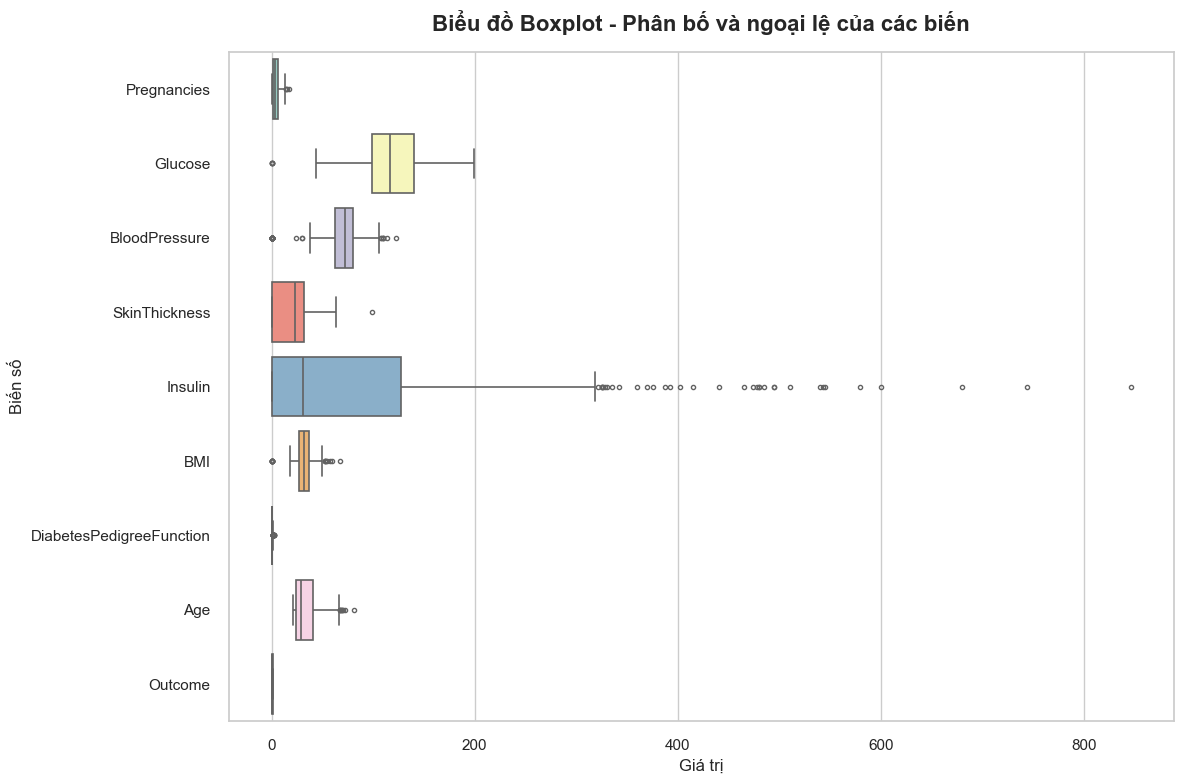

In [13]:
#Trực quan hóa dữ liệu bằng biểu đồ Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=diabetes, orient='h', palette='Set3', linewidth=1.2, fliersize=3)
plt.title("Biểu đồ Boxplot - Phân bố và ngoại lệ của các biến", fontsize=16, weight='bold', pad=15)
plt.xlabel("Giá trị", fontsize=12)
plt.ylabel("Biến số", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

#### Nhận xét:
- Ngoại lệ nghiêm trọng nhất (Insulin): Biến Insulin thể hiện mức độ ngoại lệ nghiêm trọng nhất. Hộp (IQR) tương đối hẹp, nhưng các "râu" kéo dài rất dài và có nhiều điểm ngoại lai (0 là giá trị tối thiểu, nhưng nhiều điểm ngoại lai trải dài đến gần 850). Điều này khẳng định Insulin là biến có độ phân tán cao nhất và cần được xử lý ngoại lai hoặc biến đổi log trước khi mô hình hóa.
- Mức độ ngoại lệ cao: Các biến DiabetesPedigreeFunction, SkinThickness, và Pregnancies cũng có nhiều điểm ngoại lai kéo dài về phía giá trị lớn, cho thấy chúng có phân bố lệch phải mạnh và cần xử lý ngoại lai.
- Phân bố tập trung tốt: Các biến BloodPressure, BMI, và Age có Boxplot gọn gàng hơn, các râu ngắn và ít ngoại lệ, cho thấy dữ liệu của chúng tương đối ổn định và tập trung xung quanh giá trị trung vị.
- Biến Mục tiêu Outcome: Biến mục tiêu nhị phân này được hiển thị ở giá trị 0 và 1, có thể có một số điểm ngoại lệ nhỏ đại diện cho sai số, nhưng không phải là vấn đề phân bố. Nó chủ yếu minh họa sự mất cân bằng lớp.

## (3)Phân tích mối tương quan giữa các biến
Phân tích mối tương quan (Correlation Analysis) nhằm mục đích chính là định lượng mức độ và chiều hướng của mối quan hệ tuyến tính giữa các biến số. Nó đóng vai trò quan trọng trong việc khám phá cấu trúc dữ liệu, giúp ta xác định: 
1) Mối liên hệ tự nhiên giữa các thuộc tính
2) Lựa chọn đặc trưng bằng cách ưu tiên các biến có tương quan mạnh với biến mục tiêu
3) Xử lý đa cộng tuyến (Multicollinearity) bằng cách loại bỏ các biến độc lập có tương quan quá cao với nhau, từ đó đảm bảo mô hình dự đoán được xây dựng ổn định và dễ giải thích hơn.
​

### Trực quan mối quan hệ giữa các biến bằng Heatmap
Trực quan mối tương quan giữa các biến bằng Heatmap (Biểu đồ nhiệt) nhằm mục đích chính là trình bày ma trận tương quan một cách trực quan, giúp người xem nhanh chóng đánh giá mức độ và chiều hướng của mối quan hệ tuyến tính giữa tất cả các cặp biến.
Cụ thể, Heatmap trong phân tích tương quan phục vụ các mục đích sau:
1) Đánh giá Tương quan với Biến Mục tiêu: Dễ dàng nhận ra các đặc trưng có mối quan hệ mạnh mẽ nhất (tương quan dương hoặc âm) với biến mục tiêu thông qua màu sắc đậm nhất trên hàng hoặc cột của biến mục tiêu. Đây là bước quan trọng để lựa chọn đặc trưng (Feature Selection).
2) Phát hiện Đa Cộng tuyến (Multicollinearity): Xác định các cặp biến độc lập có tương quan quá cao. Việc này cảnh báo rằng mô hình có thể bị dư thừa thông tin hoặc không ổn định, và cần loại bỏ một trong các biến liên quan.
3) Tóm tắt Toàn diện: Thay vì phải đọc một bảng số (ma trận tương quan) phức tạp, Heatmap sử dụng màu sắc và độ sáng để mã hóa giá trị tương quan, cho phép nắm bắt bức tranh tổng thể về cấu trúc tương quan của bộ dữ liệu chỉ trong một cái nhìn.

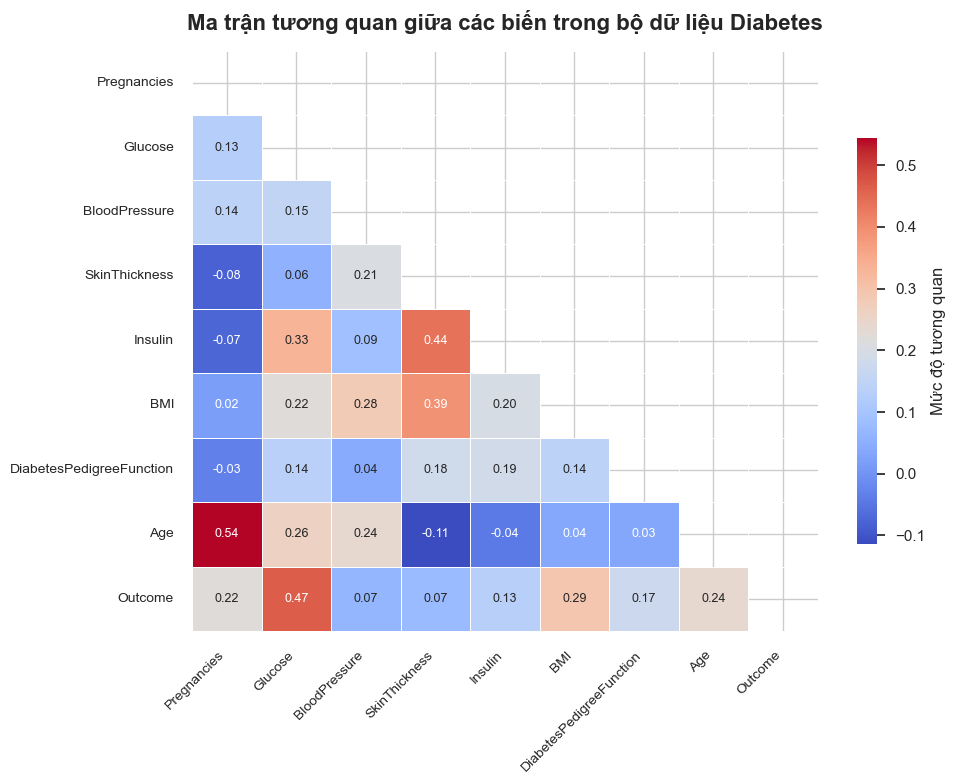

In [14]:
#Trực quan mối quan hệ giữa các biến bằng Heatmap
plt.figure(figsize=(10, 8))
corr = diabetes.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(
    corr, mask=mask, annot=True, fmt=".2f",
    cmap="coolwarm", linewidths=0.5,
    annot_kws={"size":9}, cbar_kws={'shrink': .7, 'label': 'Mức độ tương quan'}
)
plt.title("Ma trận tương quan giữa các biến trong bộ dữ liệu Diabetes", fontsize=16, weight='bold', pad=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

#### Nhân xét:
Phân tích dữ liệu Pima Indians Diabetes cho thấy sự kết hợp của các vấn đề về chất lượng dữ liệu và các mối quan hệ quan trọng. Vấn đề lớn nhất là sự mã hóa sai của giá trị 0 cho các thuộc tính sinh học Glucose, BMI, Insulin, điều này bắt buộc phải được xử lý như giá trị thiếu trước khi mô hình hóa. Thống kê mô tả chỉ ra Insulin có độ biến động cực lớn (std = 115), và dữ liệu Outcome bị mất cân bằng lớp (chỉ 34.9% mắc bệnh). Về mặt tương quan, Glucose (+0.47) là đặc trưng dự đoán mạnh nhất cho khả năng mắc bệnh, trong khi Pregnancies và Age (+0.54) thể hiện mối tương quan cao nhất giữa các biến độc lập, cần được lưu ý để tránh đa cộng tuyến. Tóm lại, dữ liệu có tiềm năng phân loại tốt nhưng cần một quá trình tiền xử lý kỹ lưỡng để giải quyết các vấn đề về chất lượng và mất cân bằng lớp.

### Trực quan mối quan hệ giữa các biến bằng Pairplot 
Trực quan mối quan hệ giữa các biến bằng Pairplot (Biểu đồ cặp) nhằm mục đích chính là cung cấp cái nhìn toàn diện và đa chiều về sự phân bố và mối quan hệ giữa mọi cặp biến trong tập dữ liệu. Pairplot cho phép ta đồng thời đánh giá hình dạng phân phối của từng biến riêng lẻ (trên đường chéo chính) và khám phá các mối quan hệ phức tạp, phi tuyến tính giữa các cặp biến (trên các ô Scatter plot). Quan trọng hơn, khi gán màu cho biến mục tiêu, Pairplot là công cụ tuyệt vời để đánh giá mức độ phân tách giữa các lớp dữ liệu, từ đó xác định liệu mô hình phân loại có tiềm năng hoạt động hiệu quả hay không.

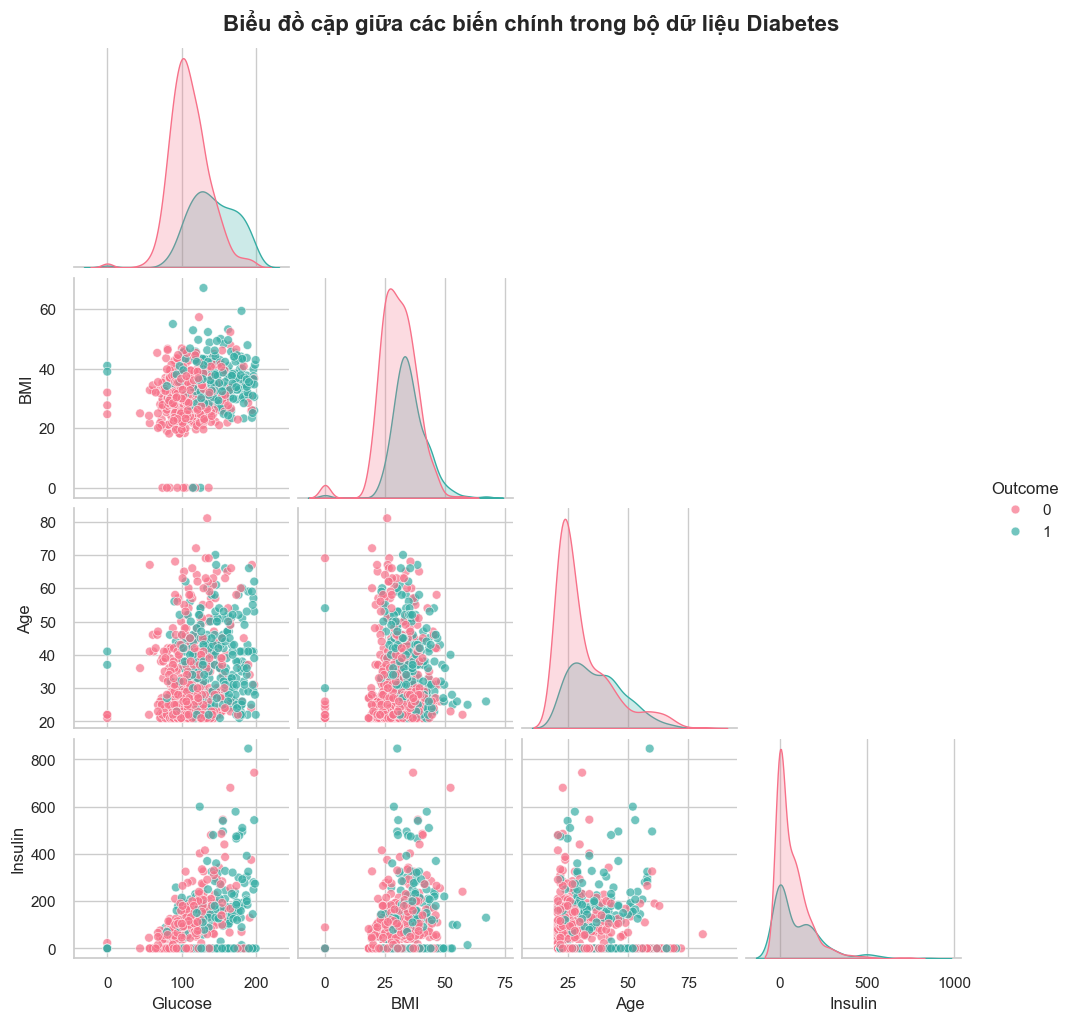

In [15]:
#Trực quan mối quan hệ giữa các biến bằng Pairplot
sns.pairplot(
    data=diabetes[['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']],
    hue='Outcome',
    diag_kind='kde',
    corner=True,
    palette='husl',
    plot_kws={'alpha':0.7, 's':40, 'edgecolor':'w'}
)
plt.suptitle("Biểu đồ cặp giữa các biến chính trong bộ dữ liệu Diabetes", y=1.02, fontsize=16, weight='bold')
plt.show()

#### Nhận xét:
Biểu đồ Pairplot (Biểu đồ cặp) của bộ dữ liệu Pima Indians Diabetes minh họa trực quan các mối quan hệ giữa các biến chính (Glucose}, BMI, Age, Insulin) và mức độ phân tách theo Outcome. Biểu đồ cho thấy sự chồng chéo đáng kể giữa hai nhóm mắc bệnh và không mắc bệnh trong hầu hết các cặp đặc trưng, ngụ ý rằng việc phân loại sẽ gặp thách thức do ranh giới giữa các lớp không rõ ràng. Tuy nhiên, biến Glucose nổi bật với tiềm năng phân biệt tốt nhất, khi nhóm mắc bệnh (Outcome = 1) có xu hướng tập trung ở các giá trị Glucose cao hơn. Ngoài ra, sự xuất hiện dày đặc của các điểm dữ liệu tại hoặc gần trục 0 trên Insulin và BMI nhấn mạnh sự cần thiết của việc tiền xử lý để làm rõ cấu trúc dữ liệu.

#  EDA trên tập dữ liệu mua sắm tại siêu thị-Online Retail

## (1) Import thư viện, cài đặt cấu hình, lấy và hiển thị dữ liệu
Bước đầu tiên nhằm chuẩn bị môi trường làm việc, bao gồm việc import các thư viện cần thiết cho quá trình xử lý, phân cụm và trực quan hóa dữ liệu, như Pandas, NumPy, Matplotlib, Scikit-learn và Seaborn.

In [16]:
#Nạp các gói lệnh cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Cài đặt style cho hiển thị
plt.style.use('seaborn-v0_8')
sns.set_theme(context='notebook', style='whitegrid', palette='muted')

In [43]:
#Load & xem nhanh dữ liệu
retail = pd.read_excel("Online_retail.xlsx")
print("Kích thước dữ liệu:", retail.shape)
retail.head()

Kích thước dữ liệu: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### Nhận xét:
- Kích thước Dữ liệu: Bộ dữ liệu là một tập lớn với 541,909 hàng và 8 cột. Kích thước này cho thấy nó là một tập dữ liệu thương mại điện tử chi tiết, cần tài nguyên tính toán đáng kể để xử lý.Cấu trúc Cột và Ý nghĩa:InvoiceNo (Số hóa đơn), StockCode (Mã kho), Quantity (Số lượng), UnitPrice (Đơn giá), CustomerID (Mã khách hàng): Các cột này chứa dữ liệu giao dịch chính, cần được kiểm tra kỹ về kiểu dữ liệu (chúng có nên là số nguyên/số thực không, hay là chuỗi?) và tính hợp lệ.
- Description (Mô tả), Country (Quốc gia): Các cột phân loại/chuỗi, có thể được dùng cho các phân tích địa lý hoặc phân loại sản phẩm.InvoiceDate (Ngày hóa đơn): Cột thời gian, cần được định dạng thành kiểu datetime để thực hiện phân tích chuỗi thời gian (time series analysis).
- Quan sát Mẫu (5 Hàng đầu):Trùng lặp và Giao dịch: Nhiều hàng đầu tiên (0 đến 4) có cùng (InvoiceNo 536365) và InvoiceDate (2010-12-01 08:26:00) cùng một CustomerID (17850.0), và cùng Country (United Kingdom). Điều này xác nhận rằng một hóa đơn bao gồm nhiều mặt hàng (StockCode) khác nhau, đây là cấu trúc điển hình của dữ liệu giao dịch.CustomerID: Cột này là số thực (float), cho thấy có thể tồn tại giá trị thiếu (NaN) hoặc khách hàng mua hàng mà không đăng ký/đăng nhập.Quantity và UnitPrice: Các giá trị ban đầu đều là dương, nhưng cần kiểm tra toàn bộ tập dữ liệu vì giao dịch trả lại có thể có Quantity âm.

## (2) Thống kê mô tả nhanh cho bộ dữ liệu

In [45]:
# Thống kê mô tả nhanh cho biến số
display(retail.describe())

# Kiểm tra kiểu dữ liệu
print("\nKiểu dữ liệu của từng cột:")
print(retail.dtypes)
retail.shape

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303



Kiểu dữ liệu của từng cột:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


(541909, 8)

#### Nhận xét:
Dựa trên kết quả Thống kê mô tả nhanh và Kiểm tra kiểu dữ liệu, bộ dữ liệu OnlineRetail là một tập dữ liệu giao dịch lớn, với 541,909 hàng và gần một năm dữ liệu. Dữ liệu cần phải được tiền xử lý chuyên sâu do ba vấn đề nghiêm trọng: 
1) Giá trị âm: Cả Quantity(min = -80995) và UnitPrice (min = -11062) đều chứa giá trị âm, đại diện cho giao dịch trả hàng hoặc các lỗi cần được xử lý riêng biệt. 
2) Giá trị thiếu: Khoảng 25% tổng số hàng (~ 135,080) bị thiếu mã khách hàng (CustomerID), đây là một vấn đề lớn cần giải quyết (bằng cách loại bỏ hoặc điền giá trị). 
3) Kiểu dữ liệu: Mặc dù InvoiceDate đã được chuyển đúng sang định dạng datetime, cột CustomerID vẫn ở kiểu float64 và cần được chuyển sang kiểu số nguyên (int) hoặc chuỗi.

## (3) Tiền xử lý dữ liệu

### Xử lý giá trị bị thiếu

In [46]:
#Kiểm tra và xử lý missing value
missing = retail.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(retail)) * 100
missing_table = pd.DataFrame({'Số lượng NA': missing, 'Tỷ lệ %': missing_percent})
display(missing_table)

,Số lượng NA,Tỷ lệ %
CustomerID,135080,24.926694
Description,1454,0.268311
StockCode,0,0.000000
InvoiceNo,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000


In [48]:
#Xóa các giá trị bị thiếu
retail_cleaned = retail.dropna(inplace=False)
retail_clean.shape

(406829, 9)

#### Nhận xét:
Sau khi xem số dữ liệu bị trống thì dữ liệu của Descript tion có tỷ lệ trống lớn, vì vậy tiến hành xóa các hàng ị trống để làm sạch dữ liêuk, và kết quae sau khi xóa dữ liệu thì bộ dự liệu mới còn 406829 quan sát

### Xử lý giá trị trùng lặp

In [50]:
#Xử lý giá trị trùng lặp
duplicates = retail_cleaned.duplicated().sum()
print(f"Số dòng bị trùng lặp hoàn toàn: {duplicates}")
if duplicates > 0:
    data = retail_cleaned.drop_duplicates()
    print(f"Đã xóa {duplicates} dòng trùng lặp. Kích thước mới:", retail_clean.shape)

Số dòng bị trùng lặp hoàn toàn: 5225
Đã xóa 5225 dòng trùng lặp. Kích thước mới: (406829, 9)


#### Nhận xét: 
Phát hiện bộ dữ liuẹ có 5225 dòng bị trùng lặp hoàn toàn và đã tiến hành xóa. Tập dữ liệu mới có kích thước (406829.9)

## (4) Phân tích một số biến quan trọng

### Biến quantity và price

In [22]:
#Phân tích biến quanity và price
invalid_qty = (retail['Quantity'] <= 0).sum()
invalid_price = (retail['UnitPrice'] <= 0).sum()

print(f"Số dòng Quantity <= 0: {invalid_qty}")
print(f"Số dòng UnitPrice <= 0: {invalid_price}")

# Giao dịch bị hủy thường có InvoiceNo bắt đầu bằng 'C'
cancelled = retail[retail['InvoiceNo'].astype(str).str.startswith('C')]
print(f"Số lượng giao dịch hủy: {cancelled.shape[0]}")

Số dòng Quantity <= 0: 10624
Số dòng UnitPrice <= 0: 2517
Số lượng giao dịch hủy: 9288


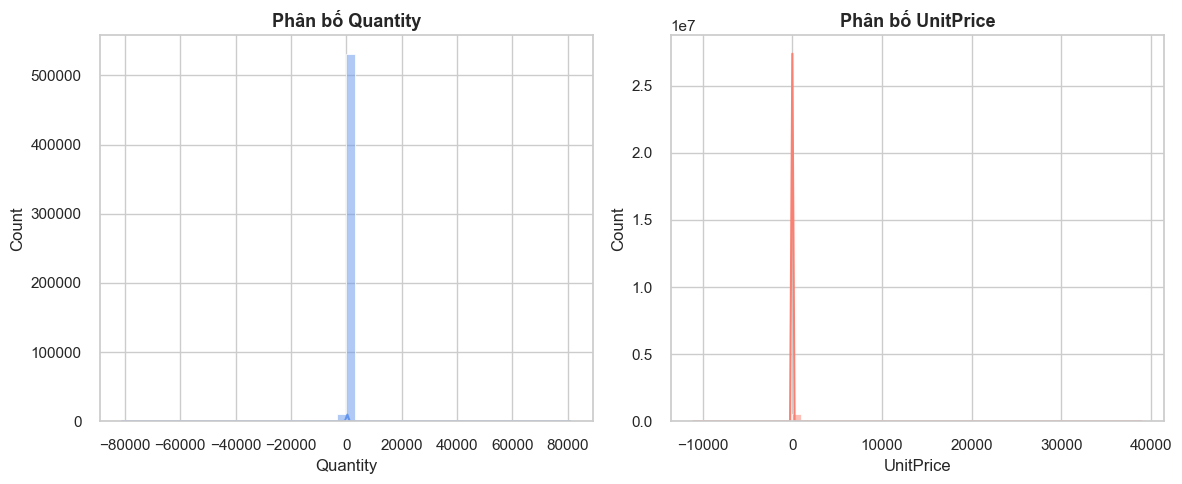

In [23]:
#Trực quan hóa phân bố của biến Quality và Price
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(retail['Quantity'], bins=50, kde=True, ax=axes[0], color='cornflowerblue')
axes[0].set_title('Phân bố Quantity', fontsize=13, weight='bold')

sns.histplot(retail['UnitPrice'], bins=50, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Phân bố UnitPrice', fontsize=13, weight='bold')

plt.tight_layout()
plt.show()

#### Nhận xét:
1) Phân bố của Quantity: 
- Tập trung Cực độ: Biểu đồ cho thấy Quantity có một thanh tần suất cực kỳ cao tập trung tại giá trị nhỏ (gần 0 hoặc 1).
- Giá trị âm và Ngoại lai: Biểu đồ thể hiện rõ sự tồn tại của các thanh nhỏ ở phía âm (từ -80,000 đến 0), đại diện cho các giao dịch trả hàng/hủy hàng. Đồng thời, có các thanh nhỏ ở phía dương xa giá trị trung tâm (lớn hơn 20,000), xác nhận sự tồn tại của các giao dịch mua số lượng lớn bất thường (ngoại lai).Nhận xét: Sự phân bố cực kỳ lệch này khiến việc phân tích trực tiếp trở nên khó khăn. Cần phải tách các giao dịch trả hàng (âm) ra khỏi giao dịch mua bình thường (dương) và xử lý các ngoại lai cực lớn để phân tích hiệu quả hơn.
2) Phân bố của UnitPrice :
- Tập trung Cực độ: Tương tự Quantity, UnitPrice có một thanh tần suất cực lớn tập trung tại giá trị gần 0.
- Giá trị âm: Biểu đồ cho thấy có sự tồn tại của các giao dịch có UnitPrice âm (mặc dù rất ít), đây là giá trị vô lý về mặt kinh doanh và có thể là lỗi dữ liệu cần được loại bỏ.
- Ngoại lai: Biểu đồ có các thanh tần suất rất nhỏ trải dài đến giá trị dương lớn (trên 30,000), cho thấy sự tồn tại của các sản phẩm có đơn giá cực cao (ngoại lai).Nhận xét: Đơn vị tiền tệ hiển thị trên trục x cho thấy sự khác biệt về độ lớn rất lớn giữa các giao dịch, cần phải loại bỏ các giá trị 0, âm và các ngoại lai cực lớn trước khi tính toán.

### Phân tích số lượng giao dịch theo tháng 

In [24]:
#Phân tích các biến quan trọng
for col in ['InvoiceNo', 'StockCode', 'CustomerID', 'Country']:
    print(f"{col}: {retail[col].nunique()} giá trị duy nhất")
    # Các bản ghi thiếu CustomerID
missing_cust = retail[retail['CustomerID'].isnull()]
print("Số dòng thiếu CustomerID:", missing_cust.shape[0])

# Các bản ghi bị hủy (InvoiceNo bắt đầu bằng 'C')
cancelled_rows = retail[retail['InvoiceNo'].astype(str).str.startswith('C')]
print("Số dòng hủy:", cancelled_rows.shape[0])

# Các bản ghi bị giá 0 hoặc âm
invalid_rows = retail[(retail['UnitPrice'] <= 0) | (retail['Quantity'] <= 0)]
print("Số dòng có giá hoặc số lượng <= 0:", invalid_rows.shape[0])

InvoiceNo: 25900 giá trị duy nhất
StockCode: 4070 giá trị duy nhất
CustomerID: 4372 giá trị duy nhất
Country: 38 giá trị duy nhất
Số dòng thiếu CustomerID: 135080
Số dòng hủy: 9288
Số dòng có giá hoặc số lượng <= 0: 11805


Khoảng thời gian dữ liệu: 2010-12-01 08:26:00 → 2011-12-09 12:50:00


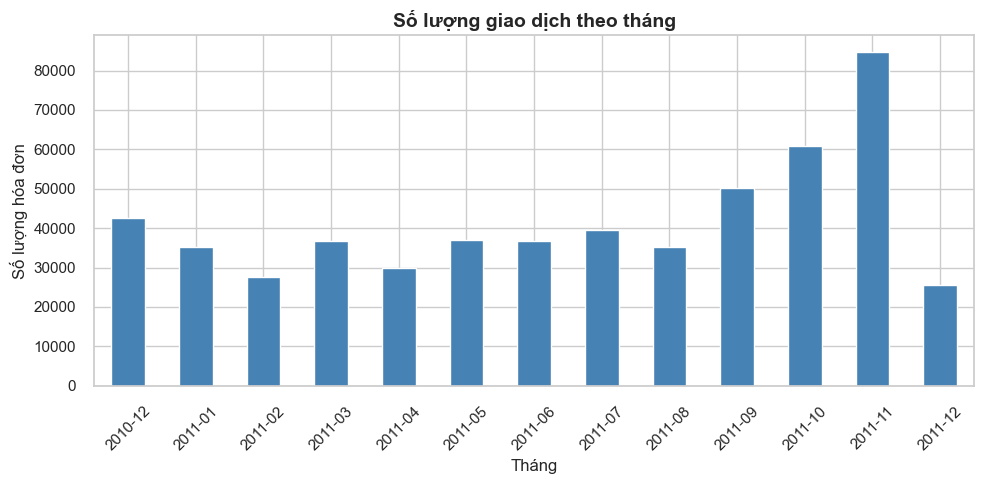

In [25]:
# Đổi sang dạng datetime (nếu chưa)
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], errors='coerce')

# Xem phạm vi thời gian
print("Khoảng thời gian dữ liệu:", retail['InvoiceDate'].min(), "→", retail['InvoiceDate'].max())

# Thêm cột tháng và năm để phân tích sâu
retail['YearMonth'] = retail['InvoiceDate'].dt.to_period('M')

#Phân tích khối lượng giao dịch theo tháng
plt.figure(figsize=(10,5))
retail['YearMonth'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title('Số lượng giao dịch theo tháng', fontsize=14, weight='bold')
plt.xlabel('Tháng')
plt.ylabel('Số lượng hóa đơn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Nhận xét:
Biểu đồ cột này mô tả số lượng giao dịch hóa đơn theo tháng trong bộ dữ liệu OnlineRetail từ 12/2010 đến 12/2011. Phân tích cho thấy một xu hướng tăng trưởng rõ ràng trong suốt năm 2011, với số lượng hóa đơn tăng ổn định qua từng tháng. Hoạt động kinh doanh đạt đỉnh cao nhất vào tháng 11/2011 (hơn 80,000 hóa đơn), phản ánh mùa mua sắm cao điểm cuối năm. Ngược lại, tháng 02/2011 có số lượng giao dịch thấp nhất. Cần lưu ý rằng dữ liệu tháng 12/2011 bị thiếu, vì chỉ ghi nhận giao dịch đến ngày 09/12, khiến tổng số hóa đơn của tháng này bị thấp giả tạo

## (5) Tổng kêt

In [26]:
#Tổng kết
print("=== TỔNG KẾT CHẤT LƯỢNG DỮ LIỆU ===")
print(f"Tổng dòng dữ liệu: {len(retail)}")
print(f"Số dòng trùng lặp: {duplicates}")
print(f"Số dòng Quantity <= 0: {invalid_qty}")
print(f"Số dòng UnitPrice <= 0: {invalid_price}")
print(f"Số dòng Invoice bị hủy: {cancelled.shape[0]}")
print(f"Số dòng thiếu CustomerID: {missing_cust.shape[0]}")

=== TỔNG KẾT CHẤT LƯỢNG DỮ LIỆU ===
Tổng dòng dữ liệu: 541909
Số dòng trùng lặp: 5268
Số dòng Quantity <= 0: 10624
Số dòng UnitPrice <= 0: 2517
Số dòng Invoice bị hủy: 9288
Số dòng thiếu CustomerID: 135080
